# 2019년 아마존 데이터 KMeans 군집 사용하기 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
amazon = pd.read_csv('./AmazonFoodCategory Dataset.csv')

-데이터 전처리

In [4]:
amazon = amazon[amazon['Discount Amount'] >=0]
amazon = amazon[amazon['Sales Price'] > 0]
amazon = amazon[amazon['Sales Quantity'] > 0]
amazon.drop(['Line Number','Sales Rep','Invoice Date', 'Order Number','Item Number', 'Item Class', 'Promised Delivery Date'], axis = 1, inplace = True)
amazon = amazon[amazon['Sales Cost Amount'] > 0]
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64223 entries, 0 to 65279
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           64223 non-null  int64  
 1   DateKey                           64223 non-null  object 
 2   Discount Amount                   64223 non-null  float64
 3   Invoice Number                    64223 non-null  int64  
 4   Item                              64223 non-null  object 
 5   List Price                        64223 non-null  float64
 6   Sales Amount                      64223 non-null  float64
 7   Sales Amount Based on List Price  64223 non-null  float64
 8   Sales Cost Amount                 64223 non-null  float64
 9   Sales Margin Amount               64223 non-null  float64
 10  Sales Price                       64223 non-null  float64
 11  Sales Quantity                    64223 non-null  int64  
 12  U/M      

-데이터 필터링(2019년 데이터만 사용)

In [6]:
amazon['DateKey'] = pd.to_datetime(amazon['DateKey'])

In [10]:
amazon_2019 = amazon[amazon['DateKey'].dt.year == 2019].reset_index(drop=True)
amazon_2019

,Custkey,DateKey,Discount Amount,Invoice Number,Item,List Price,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,U/M
0,10016609,2019-12-31,398.7300,329568,Super Vegetable Oil,163.4700,418.62,817.3500,102.99,315.63,83.724000,5,EA
1,10016609,2019-12-31,268.6700,329569,Golden Fajita French Fries,275.3700,282.07,550.7400,117.45,164.62,141.035000,2,EA
2,10016609,2019-12-31,398.7300,329569,Super Vegetable Oil,163.4700,418.62,817.3500,102.99,315.63,83.724000,5,EA
3,10016609,2019-12-31,466.4500,329569,High Top Oranges,119.5200,489.71,956.1600,213.29,276.42,61.213750,8,EA
4,10016609,2019-12-31,515.5100,329569,Tell Tale New Potatos,264.1800,541.21,1056.7200,290.56,250.65,135.302500,4,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27911,10019194,2019-01-12,488.9100,319182,Best Choice Graham Crackers,1029.9800,541.07,1029.9800,312.93,228.14,541.070000,1,EA
27912,10022444,2019-01-12,817.7200,319186,Red Spade Foot-Long Hot Dogs,1627.8400,810.12,1627.8400,475.75,334.37,810.120000,1,EA
27913,10013080,2019-01-12,1407.6497,319192,Atomic Mint Chocolate Bar,1254.1899,2354.92,3762.5697,1032.83,1322.09,784.973333,3,EA
27914,10020515,2019-01-12,233.4100,319197,Just Right Canned Tuna in Water,491.7200,258.31,491.7200,159.14,99.17,258.310000,1,EA


In [23]:
last_date = dt.datetime(2020, 1, 1) 

In [25]:
recency_data = amazon_2019.groupby('Custkey')['DateKey'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['DateKey']).dt.days

frequency_data = amazon_2019.groupby('Custkey')['Invoice Number'].count().reset_index()
frequency_data.rename(columns={'Invoice Number':'Frequency'}, inplace=True)

amazon_2019['Sales Amount']
monetary_data = amazon_2019.groupby('Custkey')['Sales Amount'].sum().reset_index()
monetary_data.rename(columns={'Sales Amount':'Monetary'}, inplace=True)

amazon_rfm_2019 = recency_data.merge(frequency_data, on='Custkey').merge(monetary_data, on='Custkey').drop(columns='DateKey')

In [26]:
amazon_rfm_2019

,Custkey,Recency,Frequency,Monetary
0,10000453,2,319,172127.15
1,10000456,51,81,122445.51
2,10000457,40,16,15438.60
3,10000458,149,6,98533.56
4,10000461,10,63,386157.58
...,...,...,...,...
343,10027340,9,25,34462.43
344,10027348,218,2,1714.11
345,10027370,148,12,22359.30
346,10027572,32,7,45928.08


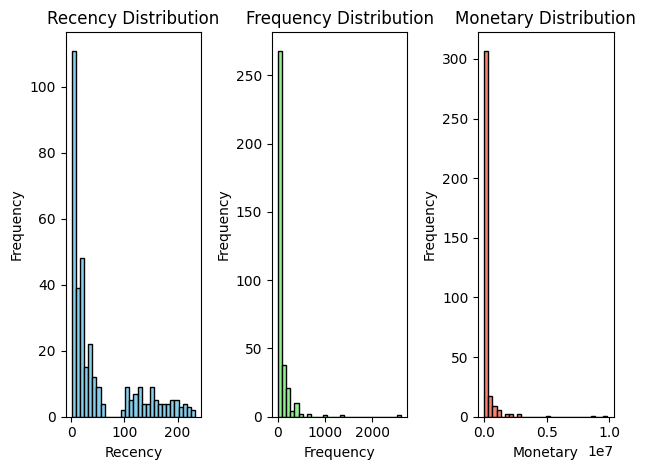

In [27]:
plt.subplot(1,3,1)
plt.hist(amazon_rfm_2019['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_rfm_2019['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_rfm_2019['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

-데이터 스케일링

In [29]:
amazon_rfm_drop = amazon_rfm_2019.drop(columns='Custkey')

In [30]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

In [32]:
bc = PowerTransformer(method='box-cox')
mm = MinMaxScaler()
amazon_rfm_rb = pd.DataFrame(bc.fit_transform(amazon_rfm_drop), columns=amazon_rfm_drop.columns)
amazon_scaled = pd.DataFrame(mm.fit_transform(amazon_rfm_rb), columns=amazon_rfm_drop.columns)

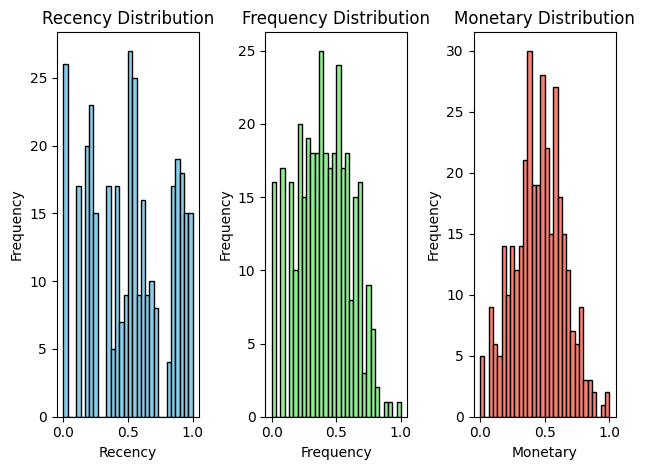

In [33]:
plt.subplot(1,3,1)
plt.hist(amazon_scaled['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
plt.hist(amazon_scaled['Frequency'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
plt.hist(amazon_scaled['Monetary'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

# K-Means 클러스터링

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

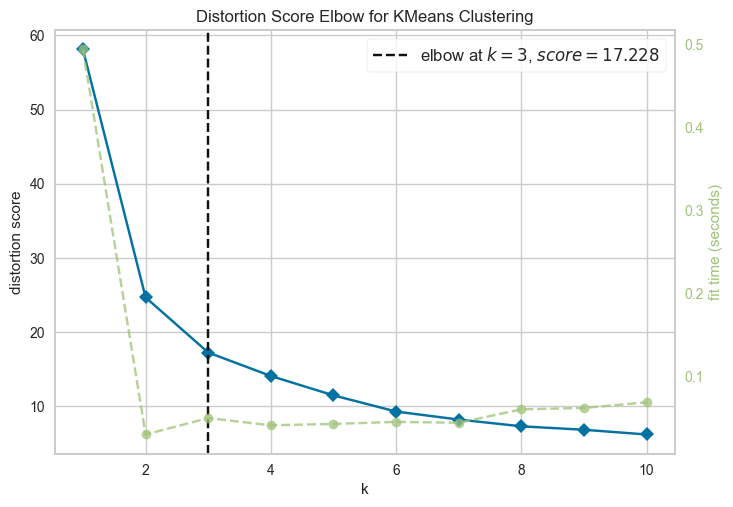

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kmeans = KMeans(random_state=42)
elbow = KElbowVisualizer(kmeans, k=(1,11))
elbow.fit(amazon_scaled)
elbow.show()

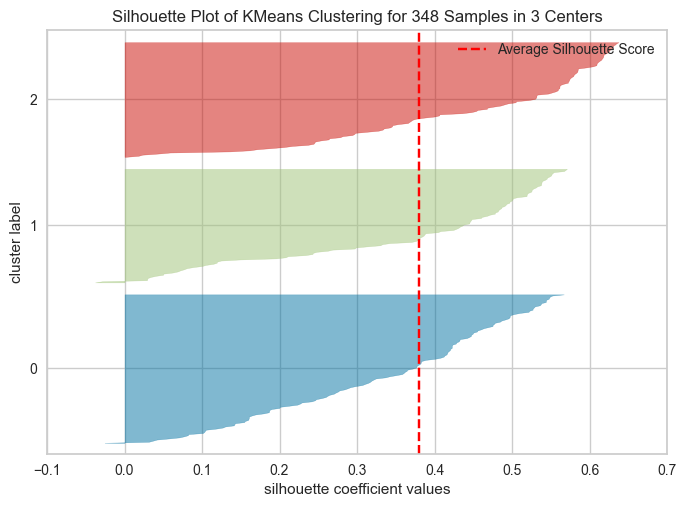

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 348 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
kmeans_3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_3, colors='yellowbrick')
visualizer.fit(amazon_scaled)
visualizer.show()

In [37]:
k=3
kmeans_3 = KMeans(3, random_state=4)
kmeans_3.fit(amazon_scaled)
cluster = kmeans_3.labels_

In [38]:
amazon_scaled['cluster']=cluster
amazon_kmeans =amazon_scaled.copy()
amazon_kmeans

,Recency,Frequency,Monetary,cluster
0,0.110755,0.733519,0.616023,0
1,0.689730,0.559498,0.584089,1
2,0.642534,0.353290,0.391174,1
3,0.905912,0.228422,0.563747,2
4,0.385258,0.527567,0.692022,0
...,...,...,...,...
343,0.366516,0.410065,0.465726,1
344,0.985846,0.088414,0.188756,2
345,0.904513,0.316678,0.425520,2
346,0.599751,0.248055,0.492469,1


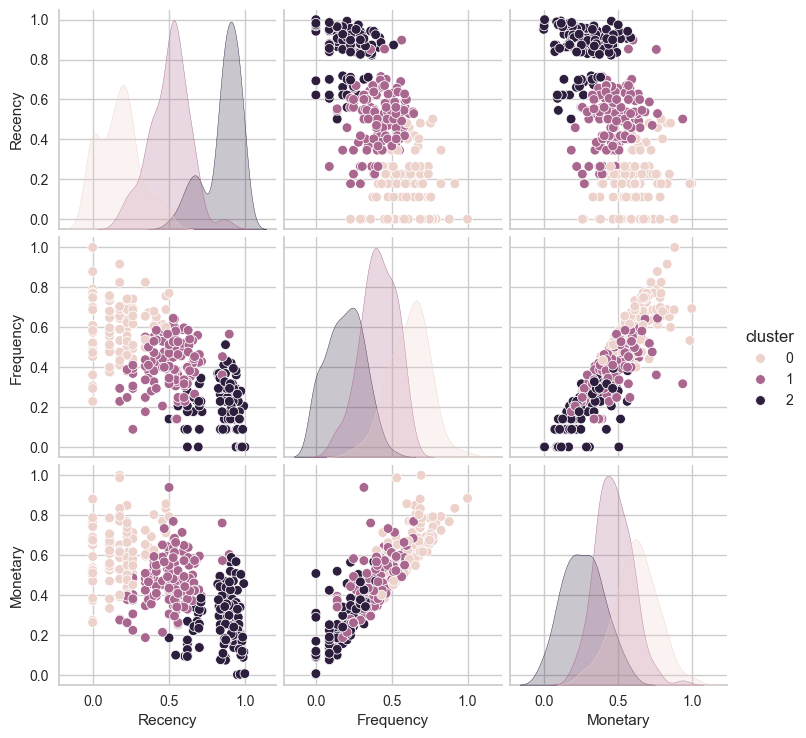

In [39]:
sns.pairplot(amazon_kmeans, hue='cluster')
plt.show()

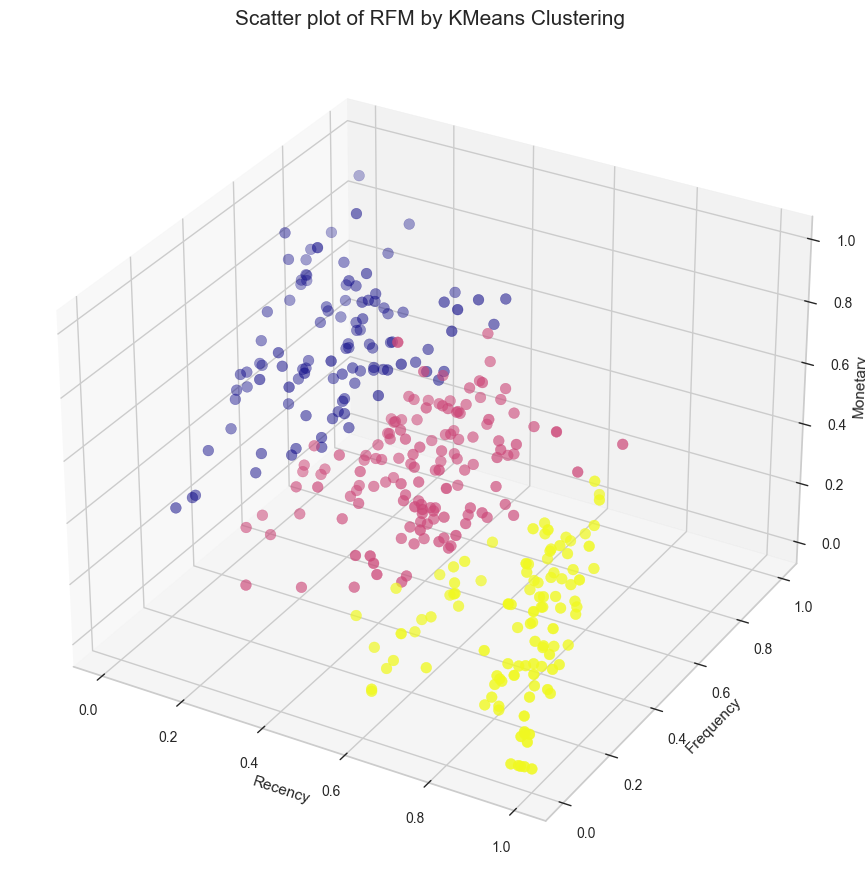

In [41]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(amazon_kmeans['Recency'], amazon_kmeans['Frequency'], amazon_kmeans['Monetary'], c=amazon_kmeans['cluster'], s=60, depthshade= True, cmap='plasma')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Scatter plot of RFM by KMeans Clustering', fontsize = 15)
plt.tight_layout()
plt.show()

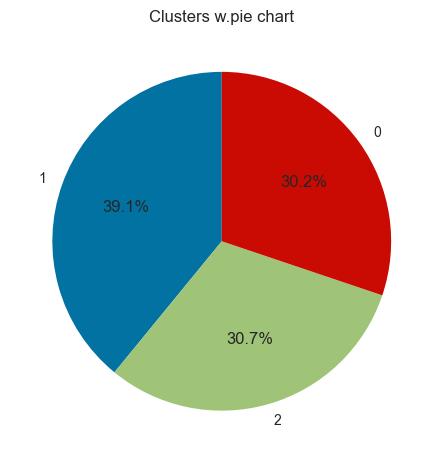

In [42]:
clusters = amazon_kmeans.cluster.value_counts()
plt.pie(clusters, labels=clusters.index, autopct='%.1f%%', startangle=90)
plt.title('Clusters w.pie chart')
plt.show()

# 가중치 구하기 

In [43]:
from lightgbm import LGBMClassifier

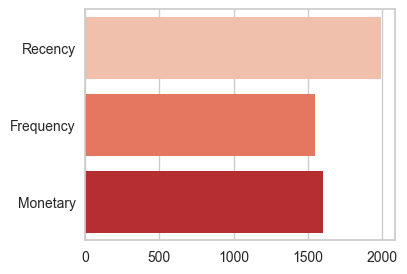

Recency: 0.39
Frequency: 0.3
Monetary: 0.31


In [44]:
X=amazon_scaled[['Recency', 'Frequency', 'Monetary']]
y=amazon_kmeans['cluster']


lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X,y)

plt.figure(figsize=(4,3))
sns.barplot(x=lgbm.feature_importances_, y=X.columns, palette='Reds')
plt.ylabel('')
plt.show()

#가중치 계산
scores = lgbm.feature_importances_/sum(lgbm.feature_importances_)
for i,c in enumerate(X.columns):
    print(f'{c}: {round(scores[i],2)}')

# 가중치 부여 - feature importance 확인